# Основная часть
## Задание
Схема типового исследования, проводимого студентом в рамках курсовой работы, содержит выполнение следующих шагов:
1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен
построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение
пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных.
Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного
обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти
моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на
основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой
библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством
baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется
отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации,
влияния значений гиперпарметров на качество моделей и т.д.
Приведенная схема исследования является рекомендуемой. В зависимости от решаемой задачи возможны модификации.
## Последовательность действий
### Поиск и выбор набора данных для построения моделей машинного обучения.
В работе используется набор данных, состоящий из 21 колонок и 7043 наблюдений. 3 столбца – числовые атрибуты, остальные - категориальные. Этот набор данных предназначен для определения оттока клиентов компании при помощью данных о клиентах.
Набор данных содержит следующие колонки:
 1. Идентификатор (CustomerID)
 2. Пол (gender)
 3. Возрастной диапазон (SeniorCitizen)
 4. Партнеры (Partners)
 5. Зависящие от клиента люди (Dependers)
 6. Срок пребывания клиентом (tenure)
 7. Телефонный сервис (TelephoneService)
 8. Несколько телефонных линий (MultipleLines)
 9. Тип подключения (InternetService)
 10. Онлайн защита (OnlineSecurity)
 11. Онлайн бэкап (OnlineBackup)
 12. Защита устройства (DeviceProtection)
 13. Техническая поддержка (TechSupport)
 14. Стриминговое ТВ (StreamingTV)
 15. Стриминговые фильмы (StreamingMovies)
 16. Режим оплаты контракта (Contract)
 17. Безбумажное выставление счета (PaperlessBilling)
 18. Способ оплаты (PaymentMethod)
 19. Ежемесячные платежи (MonthlyCharges)
 20. Общая сумма платежей (TotalCharges)
 21. Перестал ли быть клиентом (Churn)

In [3]:
!pip install catboost
!pip install category_encoders

     |████████████████████████████████| 64.8MB 57kB/s 
     |████████████████████████████████| 81kB 2.3MB/s 


## 1. Импорт библиотек <a class="anchor" id="2"></a>




In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, LogisticRegressionCV
from sklearn.svm import  SVC
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.metrics import accuracy_score, roc_auc_score


%matplotlib inline

sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Импорт базы данных <a class="anchor" id="3"></a>


In [0]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## 3. Исследовательский анализ данных <a class="anchor" id="4"></a>

In [7]:
print('размер датасета : ', df.shape)

размер датасета :  (7043, 21)


In [0]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
col_names = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
             'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
df.columns = col_names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [0]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [0]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,8824-RWFXJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 4. Исследование категориальных переменных <a class="anchor" id="5"></a>


In [0]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [0]:
for var in categorical:
     print(df[var].value_counts()/np.float(len(df)))

8824-RWFXJ    0.000142
1689-MRZQR    0.000142
6408-WHTEF    0.000142
1355-KUSBG    0.000142
8647-SDTWQ    0.000142
                ...   
2344-JMOGN    0.000142
5377-NDTOU    0.000142
3082-WQRVY    0.000142
5726-CVNYA    0.000142
1536-HBSWP    0.000142
Name: customerID, Length: 7043, dtype: float64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64
No                     0.438450
Yes                    0.344881
No intern

### 4.1 Исследование переменных 

In [0]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

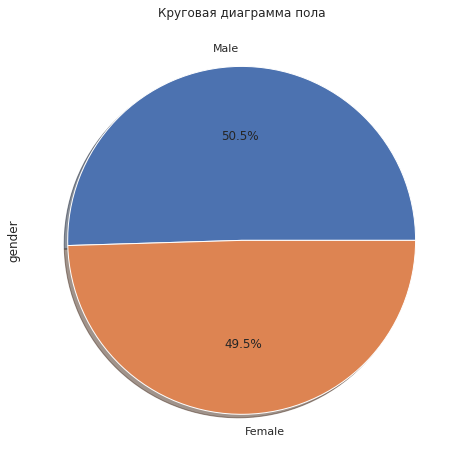

In [0]:
f,ax=plt.subplots(figsize=(18,8))

ax = df['gender'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('Круговая диаграмма пола')

plt.show()

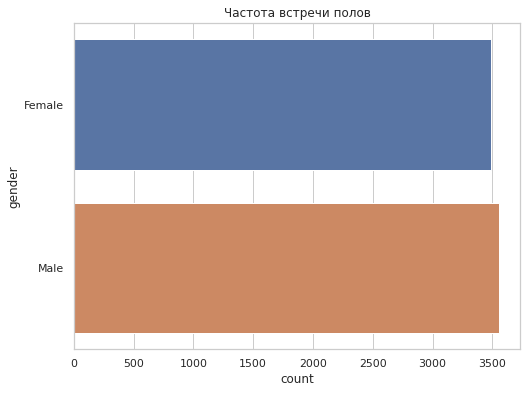

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="gender", data=df)
ax.set_title("Частота встречи полов")
plt.show()

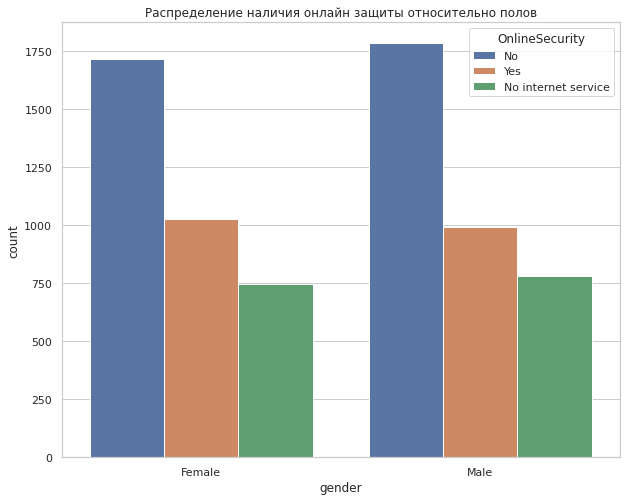

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="gender", hue="OnlineSecurity", data=df)
ax.set_title("Распределение наличия онлайн защиты относительно полов")
plt.show()

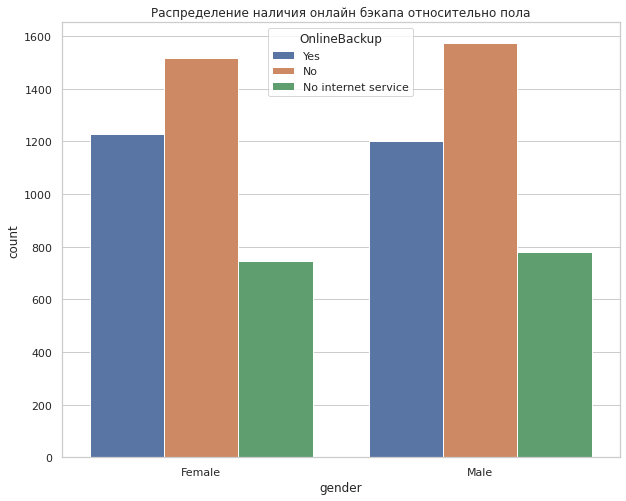

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="gender", hue="OnlineBackup", data=df)
ax.set_title("Распределение наличия онлайн бэкапа относительно пола")
plt.show()

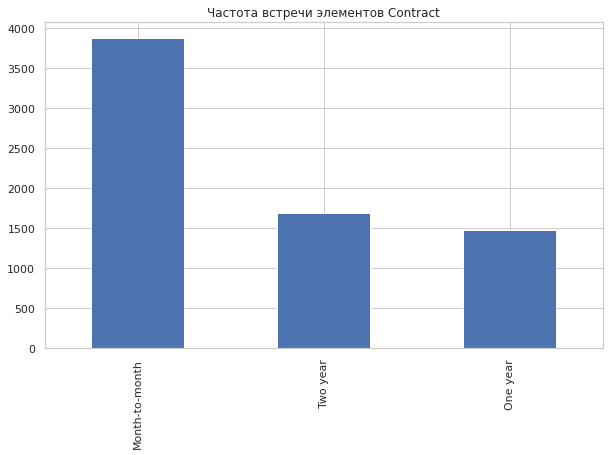

In [0]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df['Contract'].value_counts().plot(kind="bar")
ax.set_title("Частота встречи элементов Contract")
plt.show()

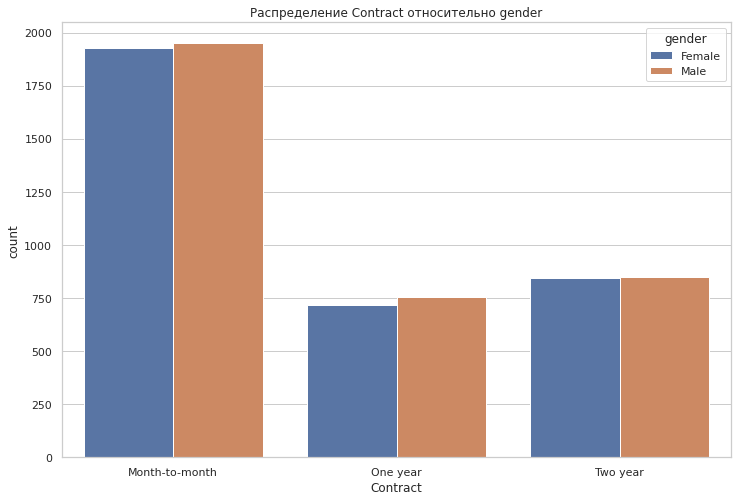

In [0]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="Contract", hue="gender", data=df)
ax.set_title("Распределение Contract относительно gender")
plt.show()

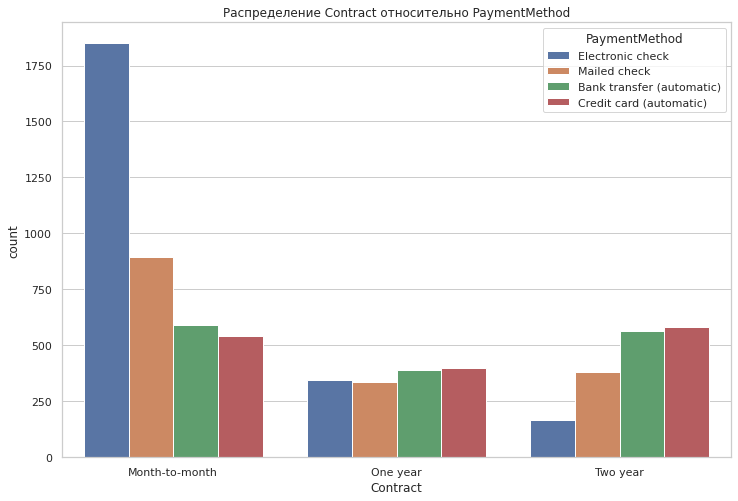

In [0]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="Contract", hue="PaymentMethod", data=df)
ax.set_title("Распределение Contract относительно PaymentMethod")
plt.show()

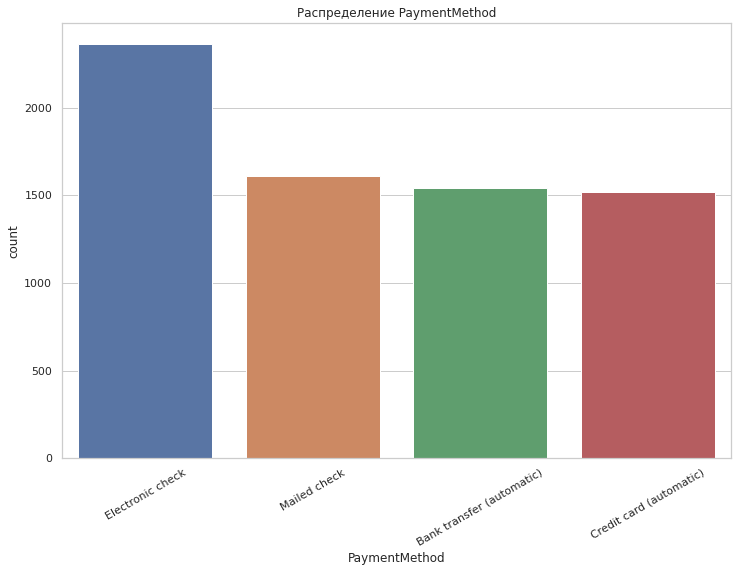

In [0]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="PaymentMethod", data=df)
ax.set_title("Распределение PaymentMethod")
ax.set_xticklabels(df.PaymentMethod.value_counts().index, rotation=30)
plt.show()

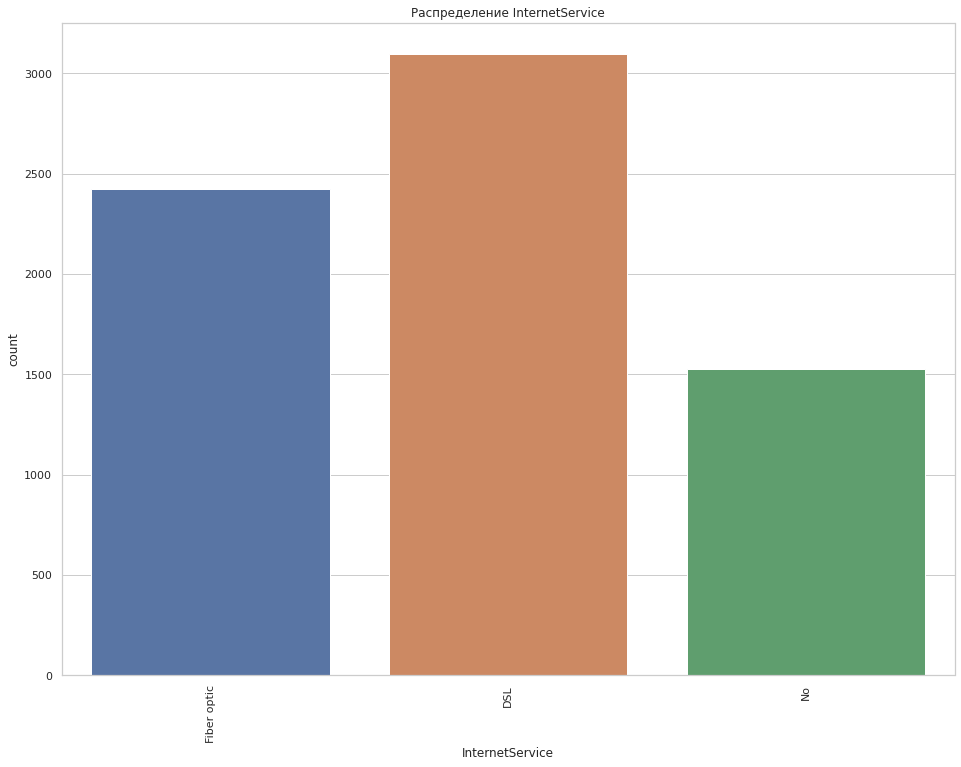

In [0]:
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="InternetService", data=df)
ax.set_title("Распределение InternetService")
ax.set_xticklabels(df.InternetService.value_counts().index, rotation=90)
plt.show()

## 5. Исследование числовых переменных <a class="anchor" id="6"></a>


In [0]:
numerical = [var for var in df.columns if df[var].dtype!='O']
df[numerical].head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [0]:
df[numerical].isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

In [0]:
df['MonthlyCharges'].nunique()

1585

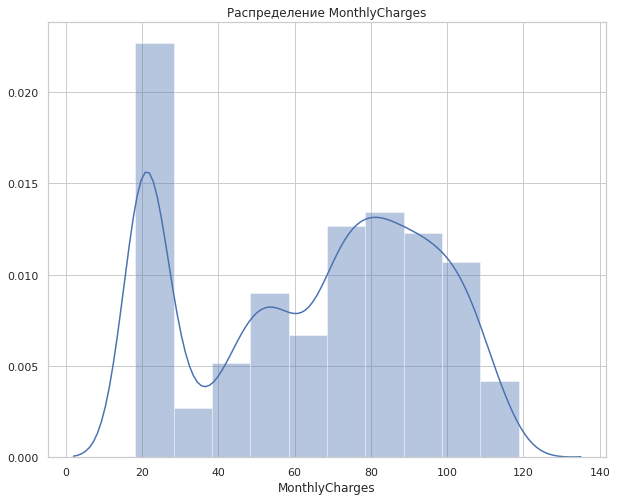

In [0]:
f, ax = plt.subplots(figsize=(10,8))
x = df['MonthlyCharges']
ax = sns.distplot(x, bins=10)
ax.set_title("Распределение MonthlyCharges")
plt.show()

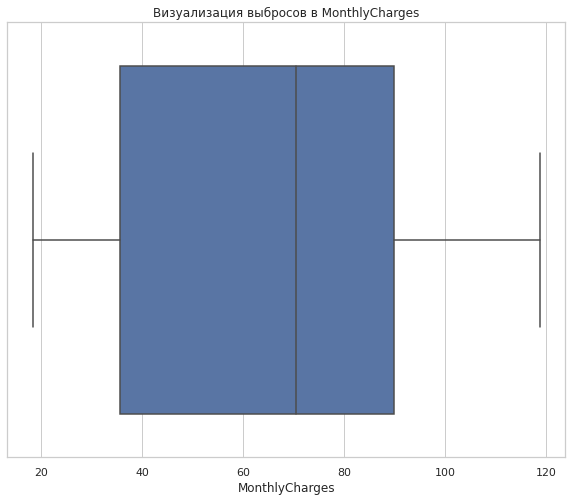

In [0]:
f, ax = plt.subplots(figsize=(10,8))
x = df['MonthlyCharges']
ax = sns.boxplot(x)
ax.set_title("Визуализация выбросов в MonthlyCharges")
plt.show()

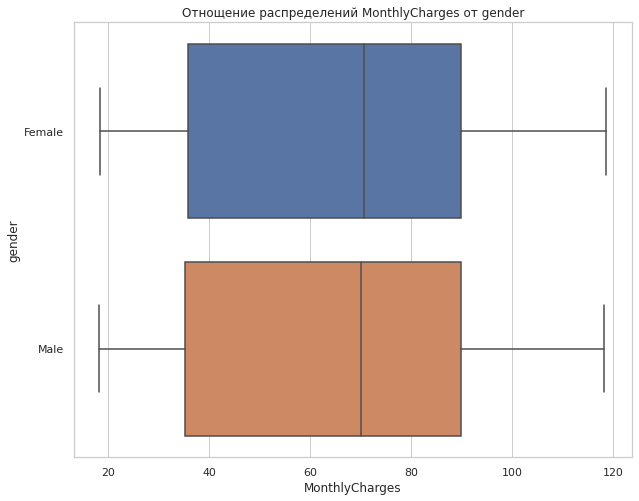

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="MonthlyCharges", y="gender", data=df)
ax.set_title("Отнощение распределений MonthlyCharges от gender")
plt.show()

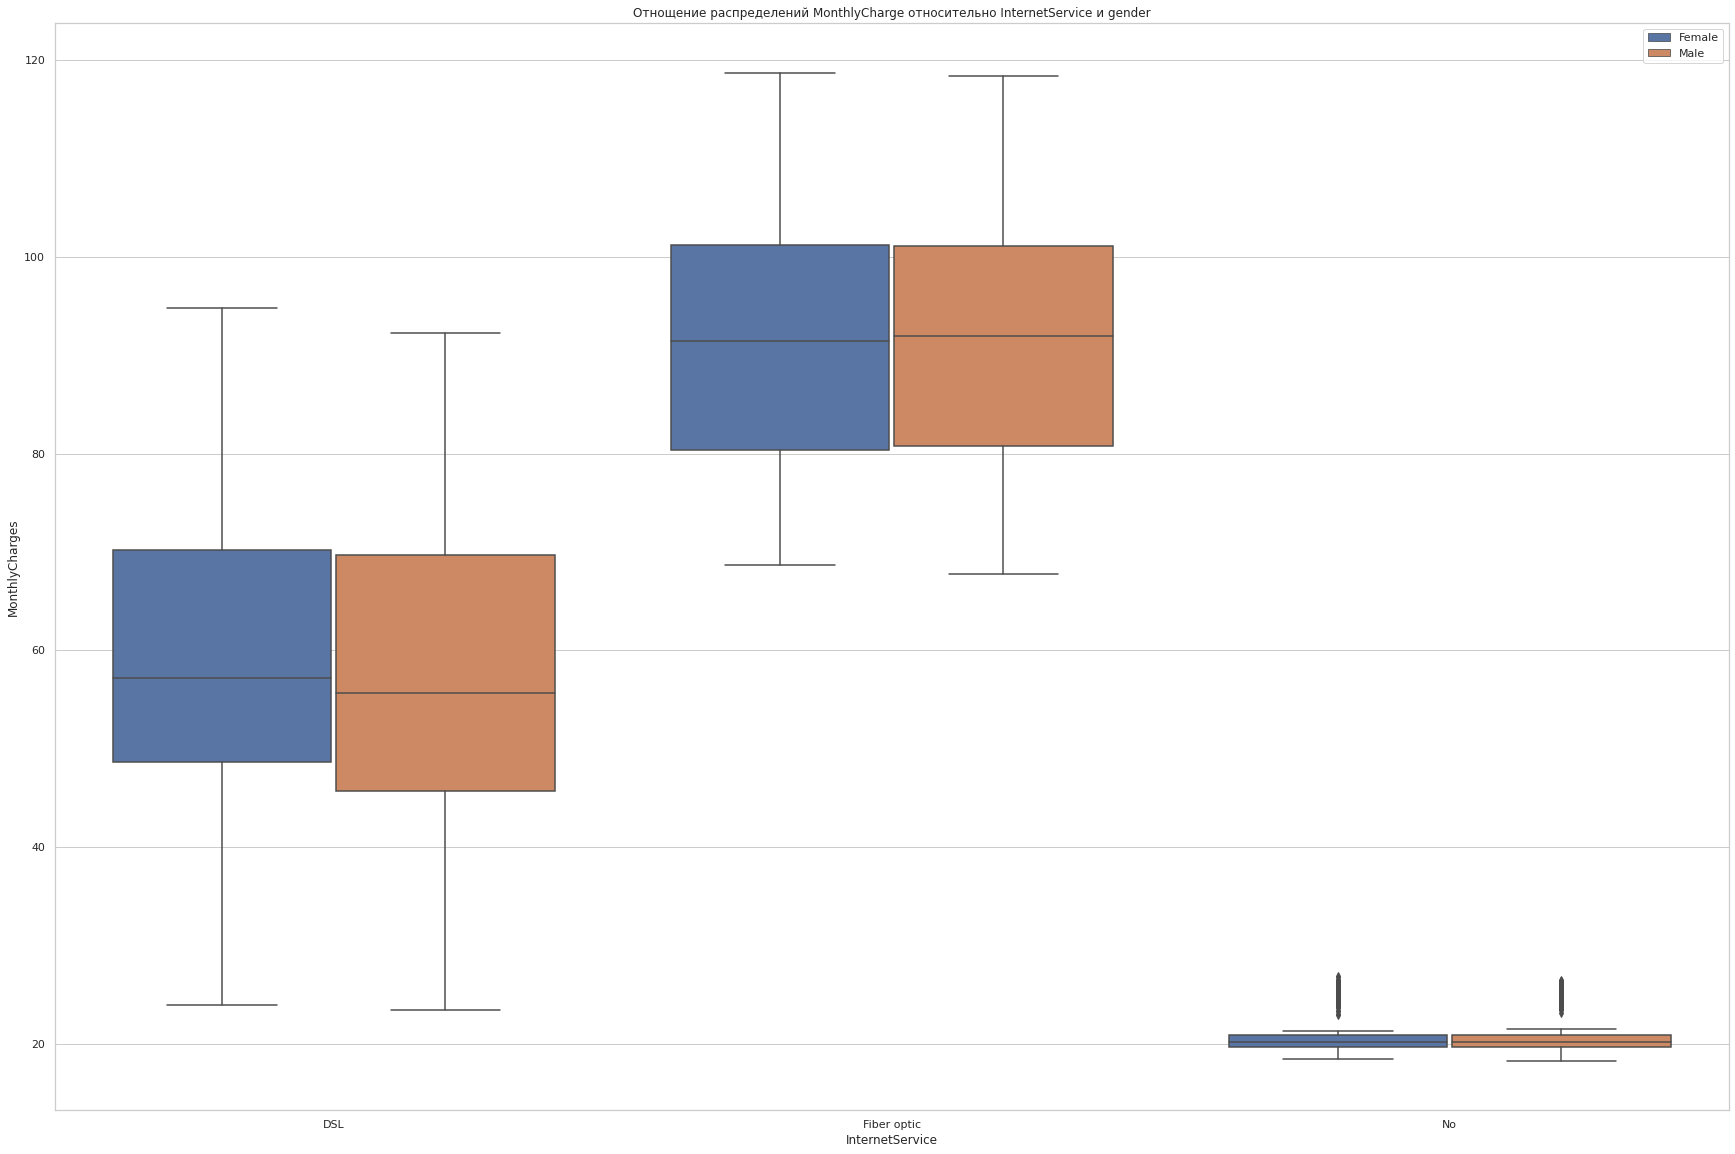

In [14]:
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.boxplot(x="InternetService", y="MonthlyCharges", hue="gender", data=df)
ax.set_title("Отнощение распределений MonthlyCharge относительно InternetService и gender")
ax.legend(loc='upper right')
plt.show()

<Figure size 576x432 with 0 Axes>

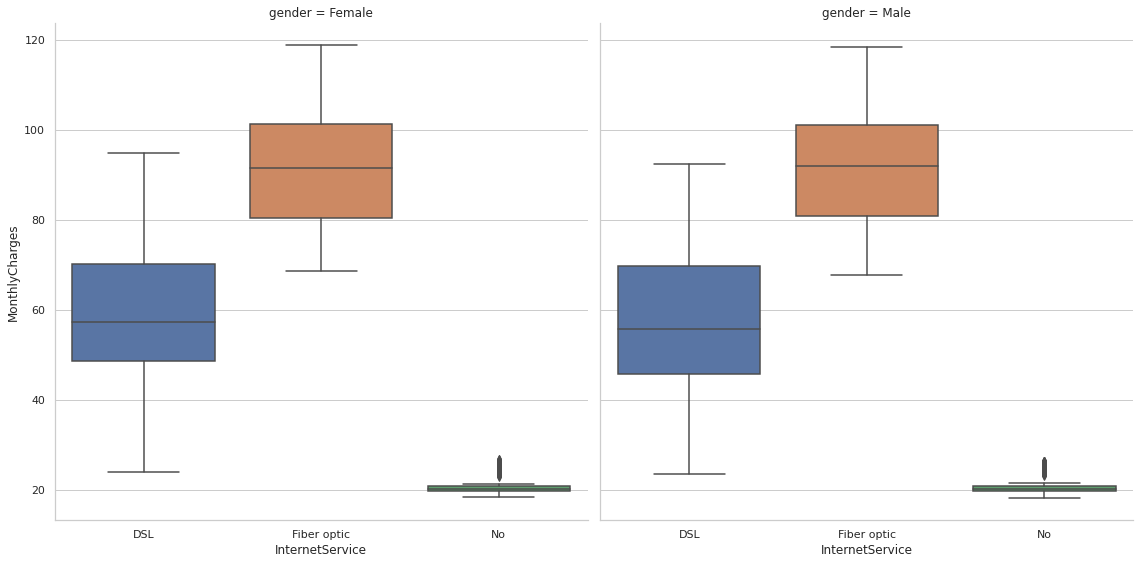

In [16]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="InternetService", y="MonthlyCharges", col="gender", data=df, kind="box", height=8, aspect=1)
plt.show()

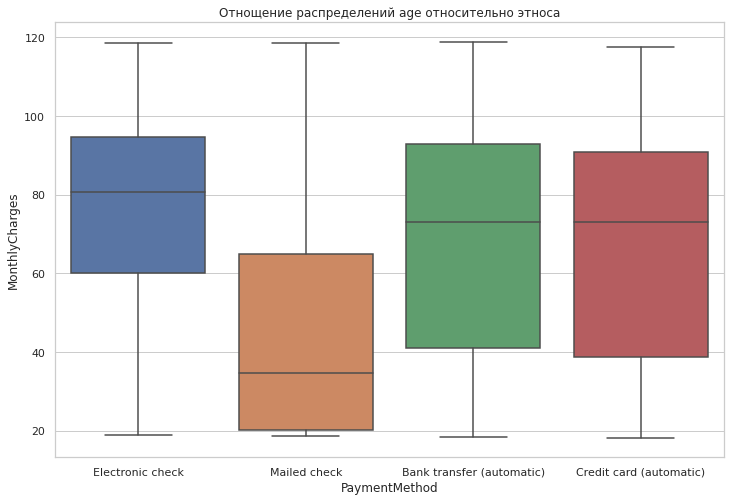

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='PaymentMethod', y="MonthlyCharges", data = df)
plt.title("Отнощение распределений age относительно этноса")
plt.show()

In [20]:
#Корреляционная матрица
df.corr().style.format("{:.4}").background_gradient(axis=1)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.0,0.01657,0.2202
tenure,0.01657,1.0,0.2479
MonthlyCharges,0.2202,0.2479,1.0


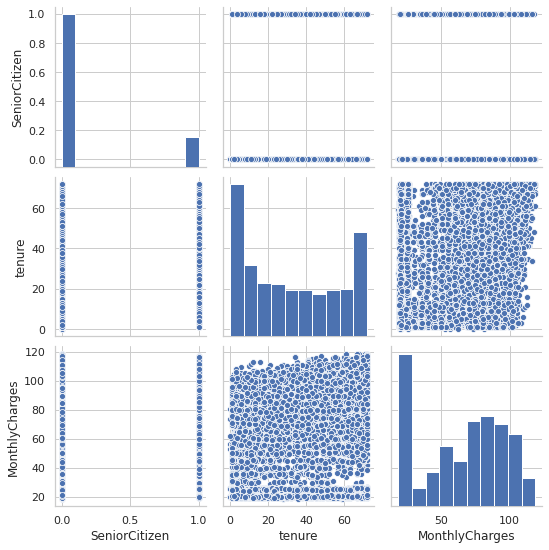

In [21]:
sns.pairplot(df)
plt.show()

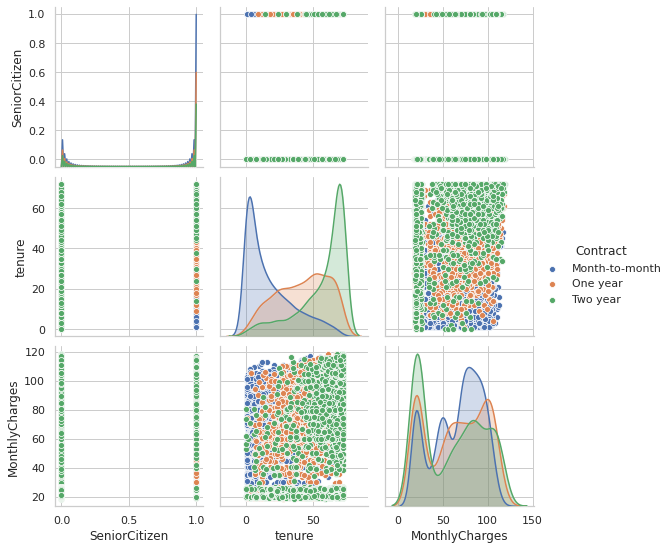

In [25]:
sns.pairplot(df, hue="Contract")
plt.show()

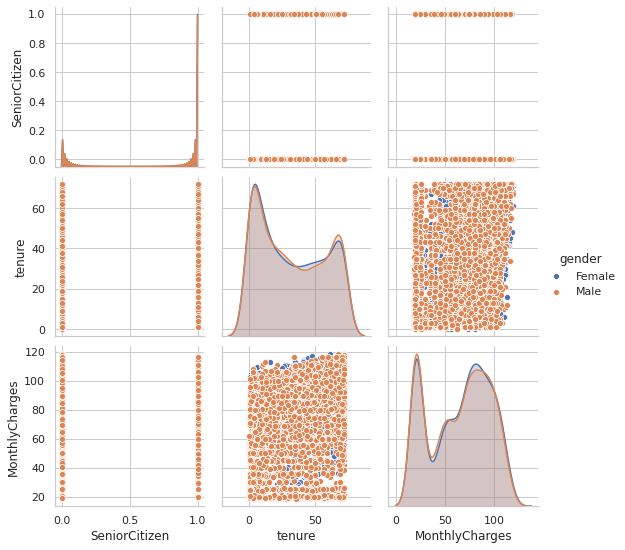

In [24]:
sns.pairplot(df, hue="gender")
plt.show()

На основании графиков можно сделать вывод, что кореллирующих признаков нет и можно включить все признаки в модель

## 6. Объявление вектора объектов и целевой переменной <a class="anchor" id="7"></a>


In [0]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

## 7. Разделение данных на отдельные тренировочные и тестовые наборы <a class="anchor" id="8"></a>


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((4930, 20), (2113, 20))

In [28]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [29]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges']

### 7.1 Шифрование категориальных значений


In [30]:
X_train[categorical].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
3580,0260-ZDLGK,Female,No,Yes,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,651.4
2364,4559-UWIHT,Male,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,1185
6813,0617-AQNWT,Female,Yes,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,3147.5
789,0229-LFJAF,Male,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),4908.25
561,7343-EOBEU,Male,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,89.05


In [0]:
encoder = ce.OneHotEncoder(cols=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [32]:
X_train.head()

,customerID_1,customerID_2,customerID_3,customerID_4,customerID_5,customerID_6,customerID_7,customerID_8,customerID_9,customerID_10,customerID_11,customerID_12,customerID_13,customerID_14,customerID_15,customerID_16,customerID_17,customerID_18,customerID_19,customerID_20,customerID_21,customerID_22,customerID_23,customerID_24,customerID_25,customerID_26,customerID_27,customerID_28,customerID_29,customerID_30,customerID_31,customerID_32,customerID_33,customerID_34,customerID_35,customerID_36,customerID_37,customerID_38,customerID_39,customerID_40,...,TotalCharges_4599,TotalCharges_4600,TotalCharges_4601,TotalCharges_4602,TotalCharges_4603,TotalCharges_4604,TotalCharges_4605,TotalCharges_4606,TotalCharges_4607,TotalCharges_4608,TotalCharges_4609,TotalCharges_4610,TotalCharges_4611,TotalCharges_4612,TotalCharges_4613,TotalCharges_4614,TotalCharges_4615,TotalCharges_4616,TotalCharges_4617,TotalCharges_4618,TotalCharges_4619,TotalCharges_4620,TotalCharges_4621,TotalCharges_4622,TotalCharges_4623,TotalCharges_4624,TotalCharges_4625,TotalCharges_4626,TotalCharges_4627,TotalCharges_4628,TotalCharges_4629,TotalCharges_4630,TotalCharges_4631,TotalCharges_4632,TotalCharges_4633,TotalCharges_4634,TotalCharges_4635,TotalCharges_4636,TotalCharges_4637,TotalCharges_4638
3580,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2364,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6813,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
789,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
561,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train.shape

(4930, 9612)

In [37]:
X_test.shape

(2113, 9612)

## 8. Построение моделей <a class="anchor" id="10"></a>
Для построения моделей выбираем:
1. Логистическую регрессию
2. Дерево решений
3. Рандомный лес
4. CatBoost
5. SVC


In [0]:
cols = X_train.columns

In [0]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [0]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [49]:
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
ans_lr = lr.predict(X_test)
print(accuracy_score(y_test, ans_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8031235210601041


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
ans_dt = dt.predict(X_test)
print(accuracy_score(y_test, ans_dt))

0.7638428774254614


In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ans_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, ans_rfc))

0.7903454803596782


In [48]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)
ans_cb = cb.predict(X_test)
print(accuracy_score(y_test, ans_cb))

Learning rate set to 0.02036
0:	learn: 0.6804178	total: 38ms	remaining: 37.9s
1:	learn: 0.6671940	total: 69.3ms	remaining: 34.6s
2:	learn: 0.6538028	total: 99.5ms	remaining: 33.1s
3:	learn: 0.6413169	total: 134ms	remaining: 33.3s
4:	learn: 0.6302964	total: 164ms	remaining: 32.6s
5:	learn: 0.6189631	total: 194ms	remaining: 32.1s
6:	learn: 0.6087558	total: 230ms	remaining: 32.6s
7:	learn: 0.5990334	total: 271ms	remaining: 33.6s
8:	learn: 0.5896535	total: 306ms	remaining: 33.7s
9:	learn: 0.5811716	total: 340ms	remaining: 33.7s
10:	learn: 0.5723818	total: 381ms	remaining: 34.2s
11:	learn: 0.5648436	total: 412ms	remaining: 33.9s
12:	learn: 0.5571303	total: 442ms	remaining: 33.6s
13:	learn: 0.5505531	total: 472ms	remaining: 33.3s
14:	learn: 0.5439777	total: 504ms	remaining: 33.1s
15:	learn: 0.5374462	total: 535ms	remaining: 32.9s
16:	learn: 0.5318690	total: 568ms	remaining: 32.9s
17:	learn: 0.5261604	total: 602ms	remaining: 32.8s
18:	learn: 0.5212118	total: 633ms	remaining: 32.7s
19:	learn: 

In [47]:
svc = SVC()
svc.fit(X_train, y_train)
ans_svc = svc.predict(X_test)
print(accuracy_score(y_test, ans_svc))

0.7988641741599621


## 9. Результаты <a class="anchor" id="18"></a>

В данном проекте лучшими моделями оказалась catboost classifier и логистическая регрессия, для "голой" модели это хороший результат. Остальные модели, кроме дерева решений, оказались лишь немного хуже.

